<a href="https://colab.research.google.com/github/azneha/Regression-Algorithms/blob/main/LogisticRegressionAsneha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression , SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [12]:
iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(x, columns = iris.feature_names)
df['target'] = y
df['flower'] = df['target'].apply(lambda x : iris.target_names[x])


In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


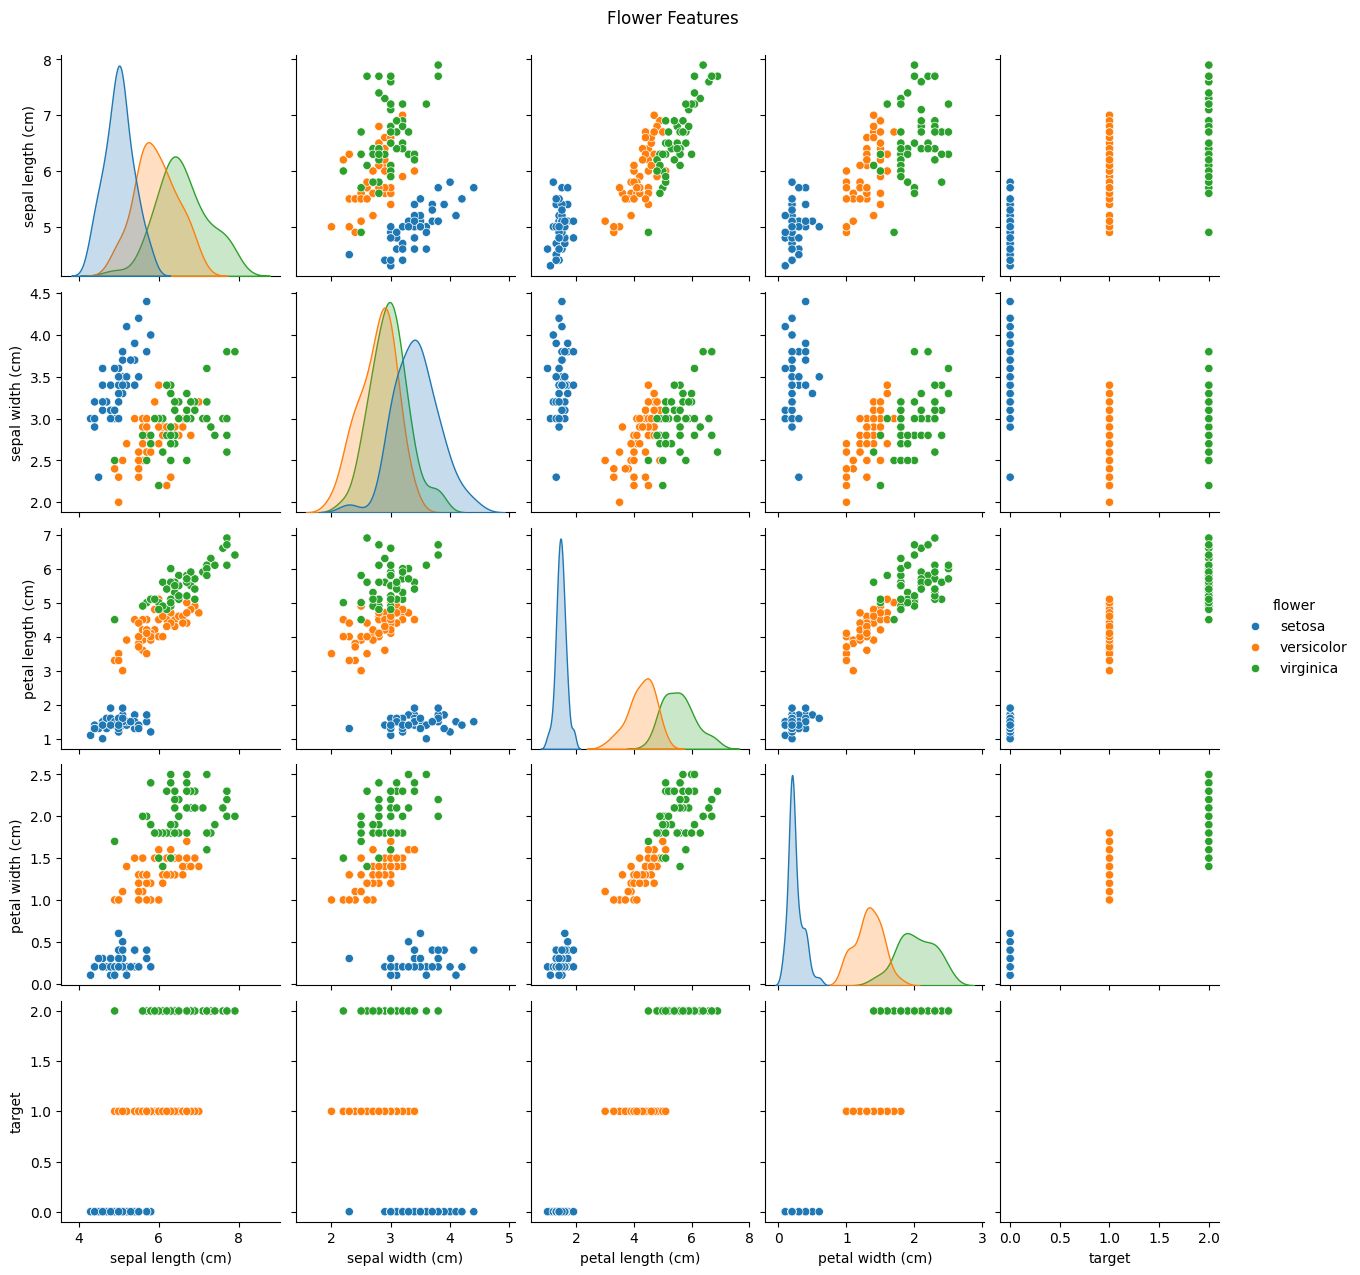

In [9]:
sns.pairplot(df , hue = 'flower' , diag_kind='kde')
plt.suptitle("Flower Features", y=1.02)
plt.show()

In [13]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

LOGISTIC REGRESSION

In [14]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled , y_train)
y_pred_log = logreg.predict(X_test_scaled)

LINEAR DISCRIMINANT ANALYSIS

In [15]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled , y_train)
y_pred_lda = lda.predict(X_test_scaled)

STOCHASTIC GRADIENT DESCENT

In [17]:
sgd = SGDClassifier(max_iter = 1000 , tol = 1e-3)
sgd.fit(X_train_scaled , y_train)
y_pred_sgd = sgd.predict(X_test_scaled)

In [19]:
#Evaluate models
models = {
     "Logistic Regression": y_pred_log,
    "LDA": y_pred_lda,
    "SGD Classifier": y_pred_sgd
         }
for name, preds in models.items():
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Classification Report:\n", classification_report(y_test, preds))
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds), "\n")


--- Logistic Regression ---
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]] 

--- LDA ---
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]] 

--- SG

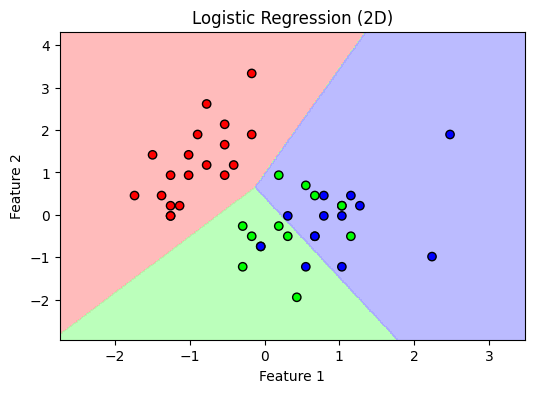

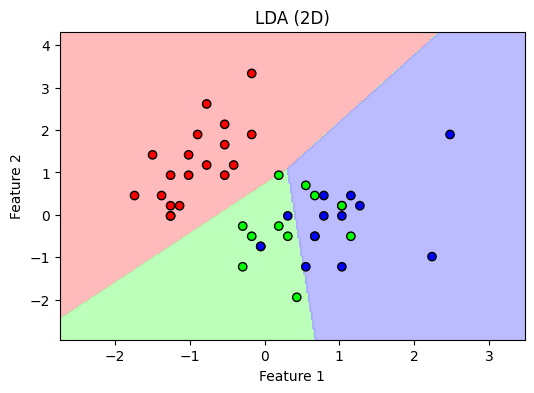

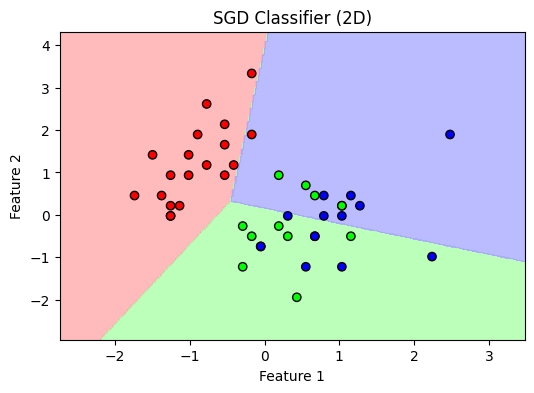

In [20]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model, X, y, title):
    X = X[:, :2]  # Use only 2 features
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 4))
    plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']), alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']))
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Re-train on 2 features for visualization
X_2d = X[:, :2]
X_train2d, X_test2d, y_train2d, y_test2d = train_test_split(X_2d, y, test_size=0.3, random_state=42)
X_train2d_scaled = scaler.fit_transform(X_train2d)
X_test2d_scaled = scaler.transform(X_test2d)

logreg_2d = LogisticRegression().fit(X_train2d_scaled, y_train2d)
lda_2d = LinearDiscriminantAnalysis().fit(X_train2d_scaled, y_train2d)
sgd_2d = SGDClassifier(max_iter=1000, tol=1e-3).fit(X_train2d_scaled, y_train2d)

plot_decision_boundary(logreg_2d, X_test2d_scaled, y_test2d, "Logistic Regression (2D)")
plot_decision_boundary(lda_2d, X_test2d_scaled, y_test2d, "LDA (2D)")
plot_decision_boundary(sgd_2d, X_test2d_scaled, y_test2d, "SGD Classifier (2D)")
